Iantsa Provost et Bastien Soucasse – Groupe 5

# Projet d’ACID – 2 janvier 2022

[Sujet](https://masterinfo.emi.u-bordeaux.fr/wiki/lib/exe/fetch.php?media=mini_projet.pdf)

## Introduction

Afin de se lancer dans la comparaison des différents algorithmes de _Machine Learning_, il nous faut des données à exploiter pour l’entraînement et en guise de test.

Commençons par importer les modules nécessaires au bon fonctionnement du projet.

In [1]:
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

On définit ensuite quelques constantes importantes.

In [2]:
NUM_CLASSES = 10
VERBOSE = True

On peut alors créer nos données à l’aide de **keras**.

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

assert len(x_train.shape) == 3
assert len(x_test.shape) == 3
assert len(y_train.shape) == 1
assert len(y_test.shape) == 1

if (VERBOSE):
    print('x_train.shape =', x_train.shape)
    print('y_train.shape =', y_train.shape)
    print('x_test.shape =', x_test.shape)
    print('y_test.shape =', y_test.shape)

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


On a également besoin d’applatir les données.

In [4]:
flattened_x_train, flattened_x_test = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

assert len(flattened_x_train.shape) == 2
assert len(flattened_x_test.shape) == 2

if (VERBOSE):
    print('flattened_x_train.shape =', flattened_x_train.shape)
    print('flattened_x_test.shape =', flattened_x_test.shape)

flattened_x_train.shape = (60000, 784)
flattened_x_test.shape = (10000, 784)


Si besoin, on peut avoir un aperçu des données.

x_train[0]:


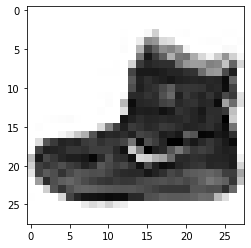

y_train[0] = 9
x_train[1]:


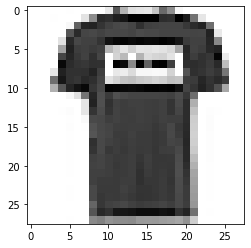

y_train[1] = 0
x_train[2]:


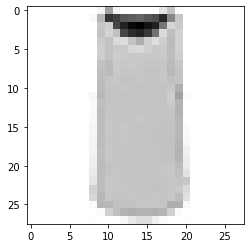

y_train[2] = 0
x_train[3]:


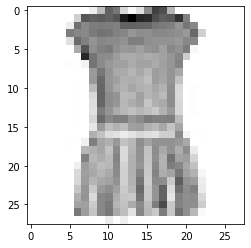

y_train[3] = 3
x_train[4]:


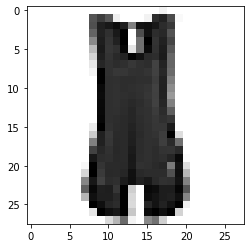

y_train[4] = 0


In [5]:
if VERBOSE:
    NUM_EXAMPLES = 5

    for i in range(NUM_EXAMPLES):
        print('x_train[%d]:' % i)
        plt.imshow(x_train[i], cmap = cm.Greys)
        plt.show()
        print('y_train[%d] =' % i, y_train[i])

## Classifications des données

Cette partie est dédiée concrètement au _Machine Learning_. Pour classifier les données on a plusieurs méthodes que l’on peut appliquer.

- k-Nearest Neighbors
- Bayes
- LDA

### k-Nearest Neightbors

Commençons par importer la classe du modèle de la classification par les `k` plus proches voisins.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

On définit ensuite les valeurs possibles pour `k`.

In [7]:
K_VALS = list(range(1, 11)) + list(range(11, 101, 20))

if VERBOSE:
    print('K_VALS =', K_VALS)

K_VALS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 31, 51, 71, 91]


On peut calculer le `score` pour chaque `k`.

In [8]:
knn_scores = {}

for k in K_VALS:
    if VERBOSE:
        print('Computing k-NN classification for k = %d…' % k)

    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(flattened_x_train, y_train)
    knn_scores[k] = model.score(flattened_x_test, y_test)

    if VERBOSE:
        print('Mean accuracy: %f.' % knn_scores.get(k))

Computing k-NN classification for k = 1…
Mean accuracy: 0.849700.
Computing k-NN classification for k = 2…
Mean accuracy: 0.846000.
Computing k-NN classification for k = 3…
Mean accuracy: 0.854100.
Computing k-NN classification for k = 4…
Mean accuracy: 0.857700.
Computing k-NN classification for k = 5…
Mean accuracy: 0.855400.
Computing k-NN classification for k = 6…
Mean accuracy: 0.854400.
Computing k-NN classification for k = 7…
Mean accuracy: 0.854000.
Computing k-NN classification for k = 8…
Mean accuracy: 0.853400.
Computing k-NN classification for k = 9…
Mean accuracy: 0.851900.
Computing k-NN classification for k = 10…
Mean accuracy: 0.851500.
Computing k-NN classification for k = 11…
Mean accuracy: 0.849500.
Computing k-NN classification for k = 31…
Mean accuracy: 0.834800.
Computing k-NN classification for k = 51…
Mean accuracy: 0.825800.
Computing k-NN classification for k = 71…
Mean accuracy: 0.821300.
Computing k-NN classification for k = 91…
Mean accuracy: 0.818000.


On récupère ainsi la précision du meilleur modèle de classification par les `k` plus proches voisins.

In [9]:
best_k = max(knn_scores, key=knn_scores.get)

print('Best k-NN model:')
print('  - Number of neighbors: %d.' % best_k)
print('  - Mean accuracy: %.2f%%.' % (knn_scores.get(best_k) * 100))

Best k-NN model:
  - Number of neighbors: 4.
  - Mean accuracy: 85.77%.


On remarque alors que le meilleur modèle de classification par les `k` plus proches voisins est celui dont le `k` est égal à 4 et sa précision est de 86%. Quant aux autres valeurs de `k`, on constate malgré tout qu’on arrive généralement au delà des 80% de précision.

### Bayes

Commençons par importer la classe du modèle de la classification bayésienne.

In [10]:
from sklearn.naive_bayes import GaussianNB

On peut calculer le `score`.

In [11]:
if VERBOSE:
    print('Computing Gaussian Naive Bayes classification…')

model = GaussianNB()
model.fit(flattened_x_train, y_train)
bayes_score = model.score(flattened_x_test, y_test)

if VERBOSE:
    print('Mean accuracy: %f.' % bayes_score)

Computing Gaussian Naive Bayes classification…
Mean accuracy: 0.585600.


On récupère ainsi la précision de la classification bayésienne.

In [12]:
print('Bayes model:')
print('  - Mean accuracy: %.2f%%.' % (bayes_score * 100))

Bayes model:
  - Mean accuracy: 58.56%.


On remarque alors que la classification bayésienne a une précision de 59%.

### LDA